<div >
<img src = "./imagen_grupo.png" />
</div>

# Gold Price Prediction
La volatilidad en los precios del oro presenta un desafío significativo para los inversionistas que buscan optimizar sus inversiones en el mercado de metales preciosos. Predecir con precisión el precio ajustado de cierre futuro del Gold ETF es crucial para tomar decisiones de inversión informadas. Sin embargo, esta tarea es compleja debido a la multitud de factores que influyen en los precios del oro, incluidas las fluctuaciones en otros metales preciosos, los precios del petróleo, el rendimiento del mercado de valores, las tasas de bonos y los tipos de cambio de divisas.

**Objetivo:**

Utilizar técnicas de Machine Learning y Data Science para desarrollar un modelo predictivo capaz de pronosticar el precio ajustado de cierre futuro del Gold ETF.

**Enfoque:**

1. Procesamiento de datos.
2. Ingeniería de Características.
3. Desarrollo del Modelo.
4. Evaluación y Validación del Modelo.
5. Implementación y Monitoreo.

**Resultado Esperado:**

Al desarrollar y desplegar con éxito un modelo predictivo para la predicción del precio del oro, los inversionistas obtendrán información valiosa sobre las tendencias y fluctuaciones del mercado, lo que les permitirá tomar decisiones de inversión basadas en datos con confianza.

**Beneficios Clave:**

1. Mejora en la Toma de Decisiones de Inversión.
2. Mejora de la Eficiencia del Mercado.
3. Ventaja Competitiva.

In [27]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 

## EDA
### Exploratory Data Analysis
En esta primera parte, es crucial llevar a cabo un análisis de los datos para comprender la estructura de sus características, así como cualquier aspecto relevante que permita una predicción precisa del precio del oro. Es esencial entender cómo están formados los datos, identificar patrones significativos y características clave que influyan en el comportamiento del mercado del oro. Este enfoque nos permitirá desarrollar modelos predictivos robustos y efectivos que puedan anticipar con precisión las fluctuaciones en el precio del oro.

In [28]:
# Leer los datos
df = pd.read_csv("../data/Gold.csv")
# Mostrar las primeras 5 filas
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [29]:
# Mostrar la dimensión de los datos
df.shape

(1718, 81)

In [30]:
# Mostrar la información de los datos(estadísticas)
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [31]:
# Mostrar el tipo de datos de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [32]:
# Verificar si hay valores nulos
df.isnull().values.sum()

0

In [33]:
# Convertir todas las columnas a minusculas
df.columns = [col.lower() for col in df.columns]

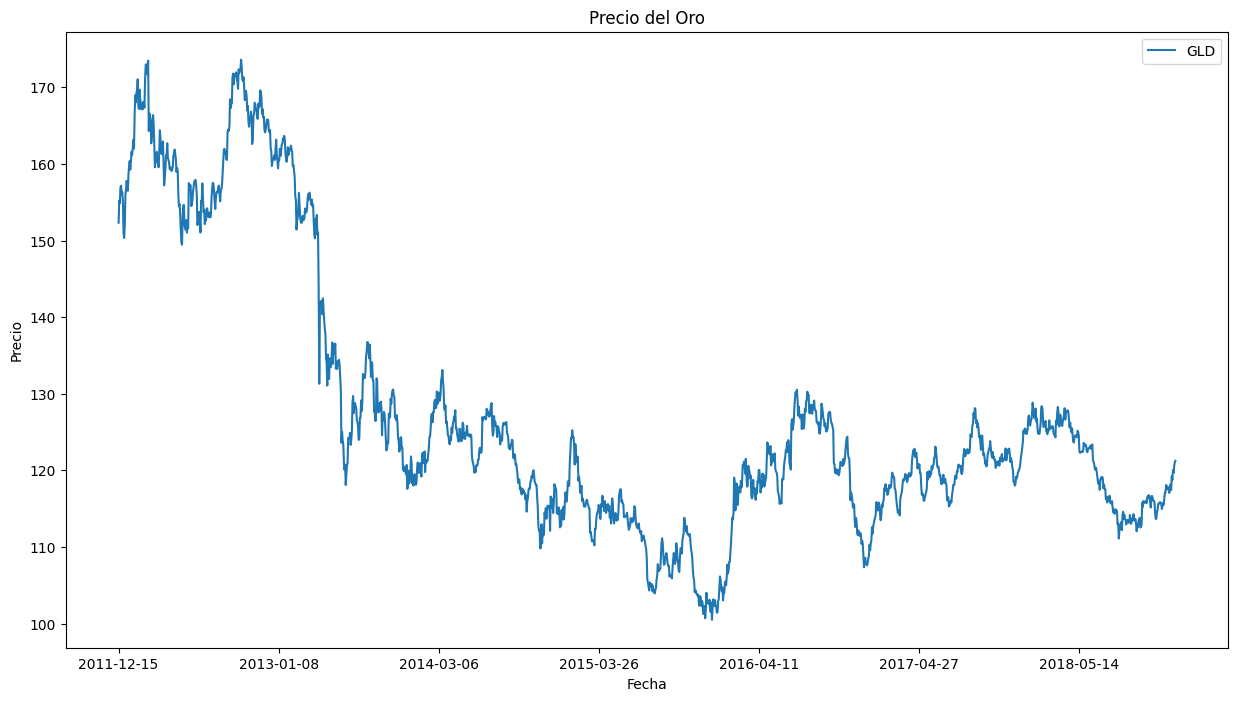

In [34]:
# Selecciona solo los datos del precio ajustado del oro
gold_close = df['adj close']

# Grafica el precio del oro
plt.figure(figsize=(15, 8))
plt.plot(df['date'],gold_close, label='GLD')
plt.title('Precio del Oro')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.xticks(np.arange(0, len(df['date']), 260), df['date'][::260])
plt.legend()
plt.show()

In [35]:
# Selecciona todas las columnas que representan precios de cierre
columnas_cierre = [col for col in df.columns if 'close' in col]
columnas_cierre

['close',
 'adj close',
 'sp_close',
 'sp_ajclose',
 'dj_close',
 'dj_ajclose',
 'eg_close',
 'eg_ajclose',
 'gdx_close',
 'gdx_adj close',
 'uso_close',
 'uso_adj close']

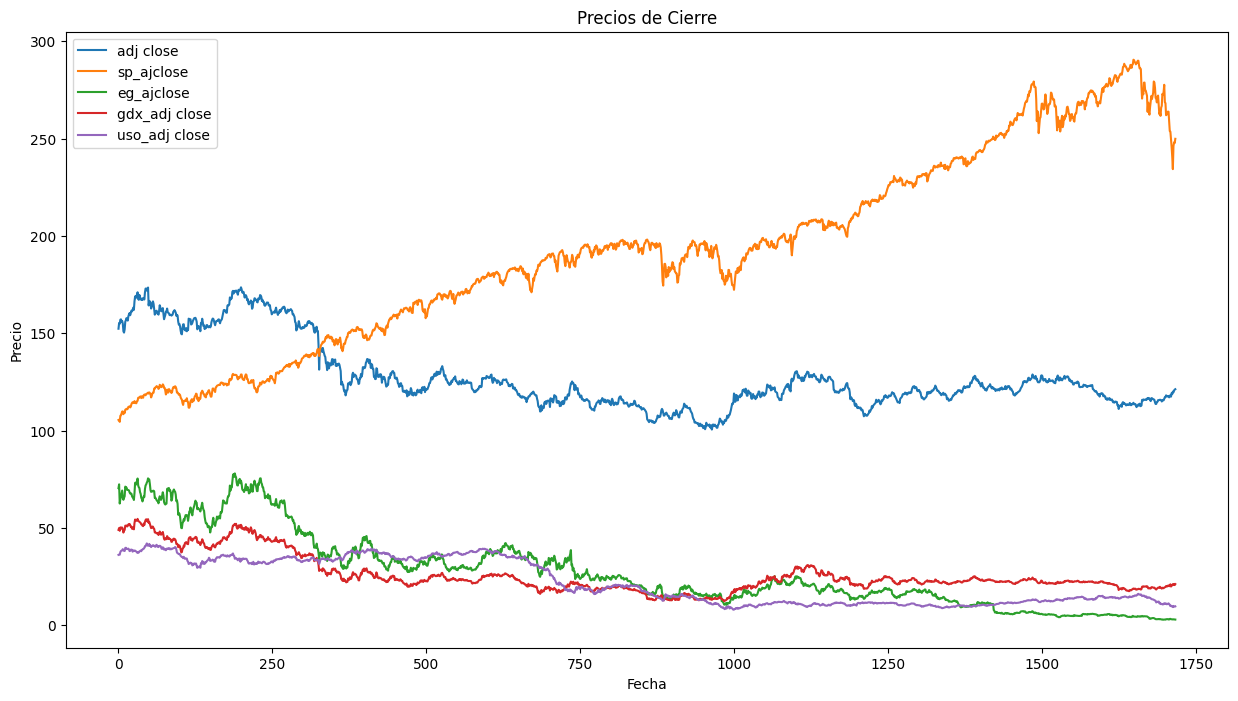

In [36]:
# sin dj porque su precio es muy alto y no se puede apreciar el resto de precios
columnas_cierre_sin_dj =['adj close',
                'sp_ajclose',
                'eg_ajclose',
                'gdx_adj close',
                'uso_adj close']
# Grafica cada precio de cierre
plt.figure(figsize=(15, 8))
for columna in columnas_cierre_sin_dj:
    plt.plot(df.index, df[columna], label=columna)

plt.title('Precios de Cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()

In [37]:
from sklearn.preprocessing import MinMaxScaler 
# los precios de sp son muy altos, por lo que se escala, para
# que se puedan visualizar mejor
df_scaler = df.copy()
scaler = MinMaxScaler()
df_scaler[columnas_cierre] = scaler.fit_transform(df_scaler[columnas_cierre])


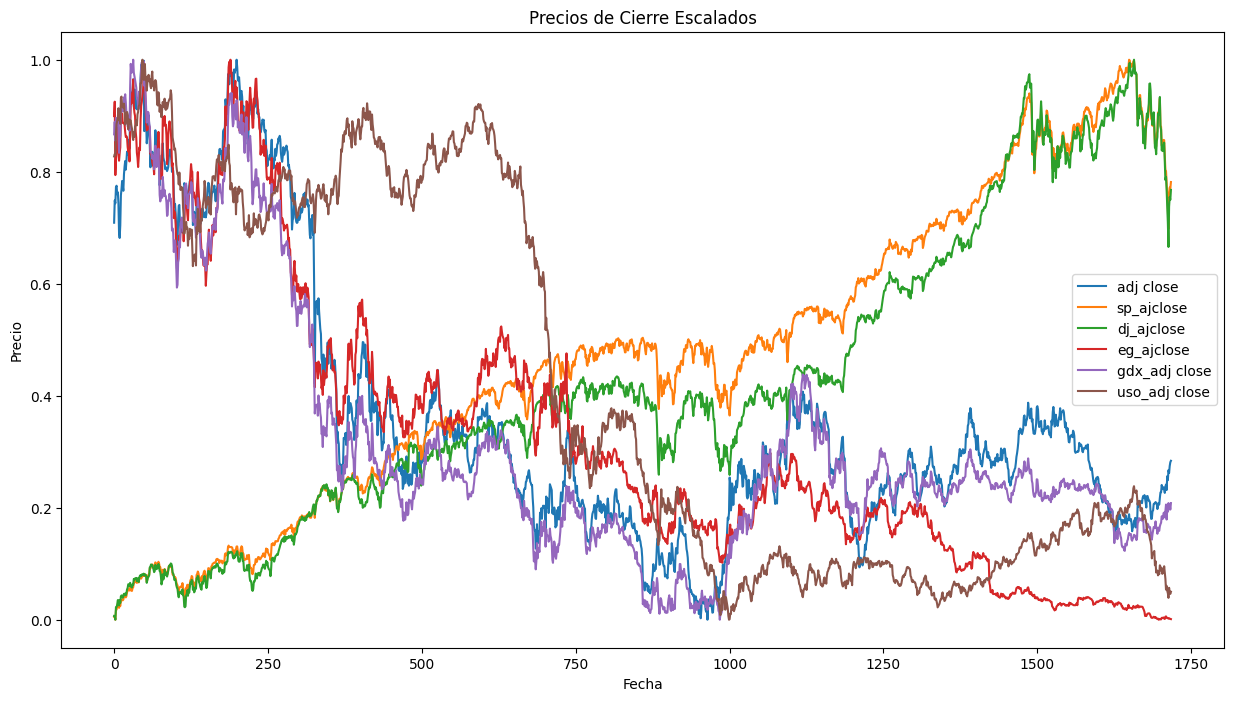

In [38]:
# Grafica cada precio de cierre
columnas_cierre =['adj close',
                'sp_ajclose',
                'dj_ajclose',
                'eg_ajclose',
                'gdx_adj close',
                'uso_adj close']
plt.figure(figsize=(15, 8))
for columna in columnas_cierre:
    plt.plot(df_scaler.index, df_scaler[columna], label=columna)

plt.title('Precios de Cierre Escalados')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()

Los activos S&P 500 y el Dow Jones Industrial Average respectivamente, parecen seguir tendencias muy similares a lo largo del tiempo, lo cual es de esperar dado que ambos reflejan el desempeño del mercado de valores de Estados Unidos y a menudo están correlacionados.

La línea gdx_adj close parece tener una tendencia menos correlacionada con los índices sp_adjclose y dj_adjclose, lo cual también es consistente con la naturaleza de un ETF de mineros de oro, ya que el precio del oro y las acciones de los mineros de oro pueden ser influenciados por diferentes factores que los del mercado de valores general.

El uso_adj close, que presumiblemente representa el United States Oil Fund, muestra una tendencia diferente a la de los índices de acciones. Esto también es esperado, ya que el precio del petróleo puede ser afectado por una variedad de factores geopolíticos y de oferta y demanda que no necesariamente impactan directamente en el mercado de valores.

Por último, el activo etiquetado como eg_adjclose presenta un patrón único comparado con los otros activos. No tengo suficiente información para determinar a qué se refiere eg, pero su tendencia es claramente distinta.

Hacia el final del gráfico, podemos ver que todos los activos excepto el eg_adjclose muestran un descenso, lo cual podría indicar una caída general del mercado o una corrección. La línea eg_adjclose, por otro lado, muestra un patrón de volatilidad y finalmente un descenso pronunciado

### Retornos

<Figure size 1500x1000 with 0 Axes>

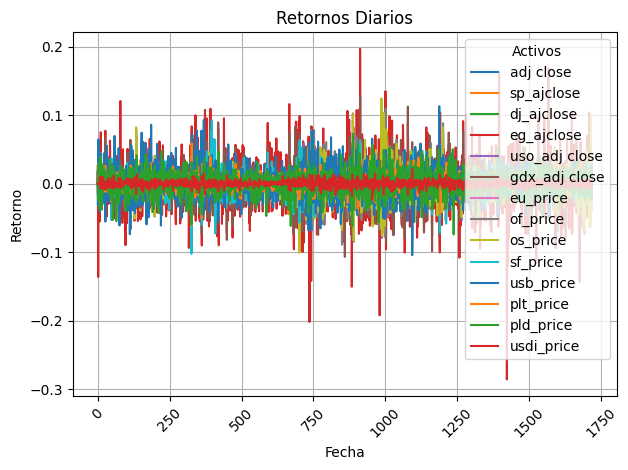

In [39]:
def retornos(df):
    # Calcula el retorno diario para todo el DataFrame
    retorno = df.pct_change().fillna(0)
    return retorno

columns_of_interest = [
    "adj close",
    "sp_ajclose",
    "dj_ajclose",
    "eg_ajclose",
    "uso_adj close",
    "gdx_adj close",
    "eu_price",
    "of_price",
    "os_price",
    "sf_price",
    "usb_price",
    "plt_price",
    "pld_price",
    "usdi_price",
]
df_cierre = df[columns_of_interest]


# Calculamos el retorno diario para todas las columnas de una vez
daily_returns = retornos(df_cierre)

# Graficar los retornos diarios usando las capacidades de plotting de pandas
plt.figure(figsize=(15, 10))
daily_returns.plot(title='Retornos Diarios')
plt.xlabel('Fecha')
plt.ylabel('Retorno')
plt.legend(title='Activos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Indicadores Técnicos
En este apartado, es crucial abordar los indicadores técnicos, dado que son herramientas fundamentales para analizar patrones en series temporales. Estos indicadores permiten una mejor comprensión de las tendencias y patrones subyacentes en los datos, lo que a su vez facilita la predicción más precisa del modelo en cuestión.





In [40]:
#TODO: Apartir de la libreria ta elaborar un analisis tecnico de los datos e incluirlos en los features (X)
# para la predicción del modelo

## Modelos

En esta sección de modelos, se implementarán seis modelos diferentes y se evaluará su desempeño utilizando métricas como el Error Cuadrático Medio (MSE) y la Raíz del Error Cuadrático Medio (RMSE). Estas métricas nos proporcionarán una medida cuantitativa de la precisión de cada modelo, lo que nos permitirá comparar y seleccionar el mejor en función de su capacidad para minimizar la discrepancia entre los valores observados y los predichos.

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import dates as mdates

In [42]:
df_cierre

,adj close,sp_ajclose,dj_ajclose,eg_ajclose,uso_adj close,gdx_adj close,eu_price,of_price,os_price,sf_price,usb_price,plt_price,pld_price,usdi_price
0,152.330002,105.441238,11868.80957,70.431755,36.130001,48.973877,1.3018,105.09,93.42,53604,1.911,1414.65,618.85,80.341
1,155.229996,105.597549,11866.38965,72.364037,36.270000,49.921513,1.3035,103.35,93.79,53458,1.851,1420.25,623.65,80.249
2,154.869995,104.468536,11766.25977,62.509384,36.200001,48.490578,1.2995,103.64,94.09,52961,1.810,1411.10,608.80,80.207
3,156.979996,107.629784,12103.58008,64.731514,37.560001,50.215282,1.3079,106.73,95.55,53487,1.927,1434.75,626.65,80.273
4,157.160004,107.838242,12107.74023,66.180725,38.110001,50.186852,1.3045,107.71,99.01,53148,1.970,1429.05,635.90,80.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,120.019997,234.339996,21792.19922,2.950000,9.290000,21.090000,1.1400,50.47,42.27,37541,2.736,788.40,1172.80,96.007
1714,119.660004,246.179993,22878.44922,3.000000,9.900000,20.620001,1.1353,54.47,46.39,38253,2.810,799.25,1190.10,96.568
1715,120.570000,248.070007,23138.82031,2.950000,9.620000,20.969999,1.1430,52.16,45.23,38690,2.774,795.50,1196.00,96.001
1716,121.059998,247.750000,23062.40039,2.900000,9.530000,20.600000,1.1438,52.20,44.92,38706,2.716,790.25,1185.20,95.965


In [43]:
# Selecciona las columnas de interés
X = df_cierre.drop(columns=['adj close'])

# columna objetivo
y = df_cierre[['adj close']]
# Define el tamaño del conjunto de prueba como una proporción del conjunto de datos completo
test_size = 0.2

# Calcula el índice en el que se debe dividir el conjunto de datos para obtener la proporción deseada
split_idx = int(X.shape[0] * (1 - test_size))

# Divide los datos en entrenamiento y prueba sin mezclar
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

### Regresión Lineal

In [44]:
# inicializar los diccionarios para guardar los resultados
mse_dict = {}
rmse_dict = {}

# Función para ver el rendimiento del modelo
def rendimiento_modelo(model, model_name,mse_dict, rmse_dict):
    # Predicciones
    predicted = model.predict(X_test)
    # Rsmse and R2 score
    RSME_score = np.sqrt(mean_squared_error(y_test, predicted))
    # Imprimir los resultados
    print("Rendimiento del modelo")
    print("--------------------------------------")
    mse = mean_squared_error(y_test, predicted)
    print(f"MSE      : {mse:.2f}")
    print(f'RMSE     : {RSME_score:.2f}')
    R2_score = r2_score(y_test, predicted)
    print(f'R2 score : {R2_score:.2f}')
    print("--------------------------------------")
    
    # Guardar los resultados
    mse_dict[model_name] = mse
    rmse_dict[model_name] = RSME_score
    
    # Graficar los resultados
    # Predicciones vs Actual
    plt.figure(figsize=(16, 8))
    plt.plot(y_test.index, predicted,'red', label='Predict')
    plt.plot(y_test.index, y_test,'black', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    # 45 grados
    plt.gcf().autofmt_xdate()
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()
    


Rendimiento del modelo
--------------------------------------
MSE      : 29.01
RMSE     : 5.39
R2 score : -0.35
--------------------------------------


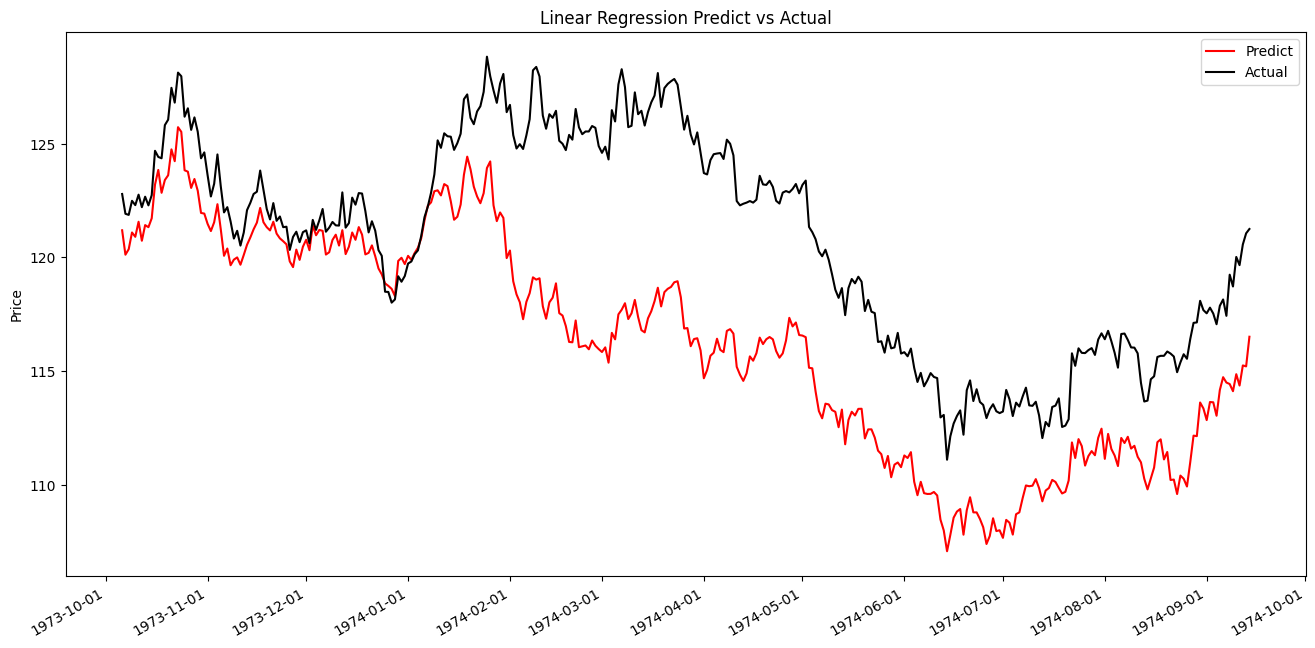

In [45]:
# modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

rendimiento_modelo(lr, "Linear Regression",mse_dict, rmse_dict)

### Regresión Lasso

In [46]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

c:\Users\jpber\OneDrive\Documents\Universidad\QuantConsulting\Git\GOLD-FORECAST\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Rendimiento del modelo
--------------------------------------
MSE      : 159.23
RMSE     : 12.62
R2 score : -6.43
--------------------------------------


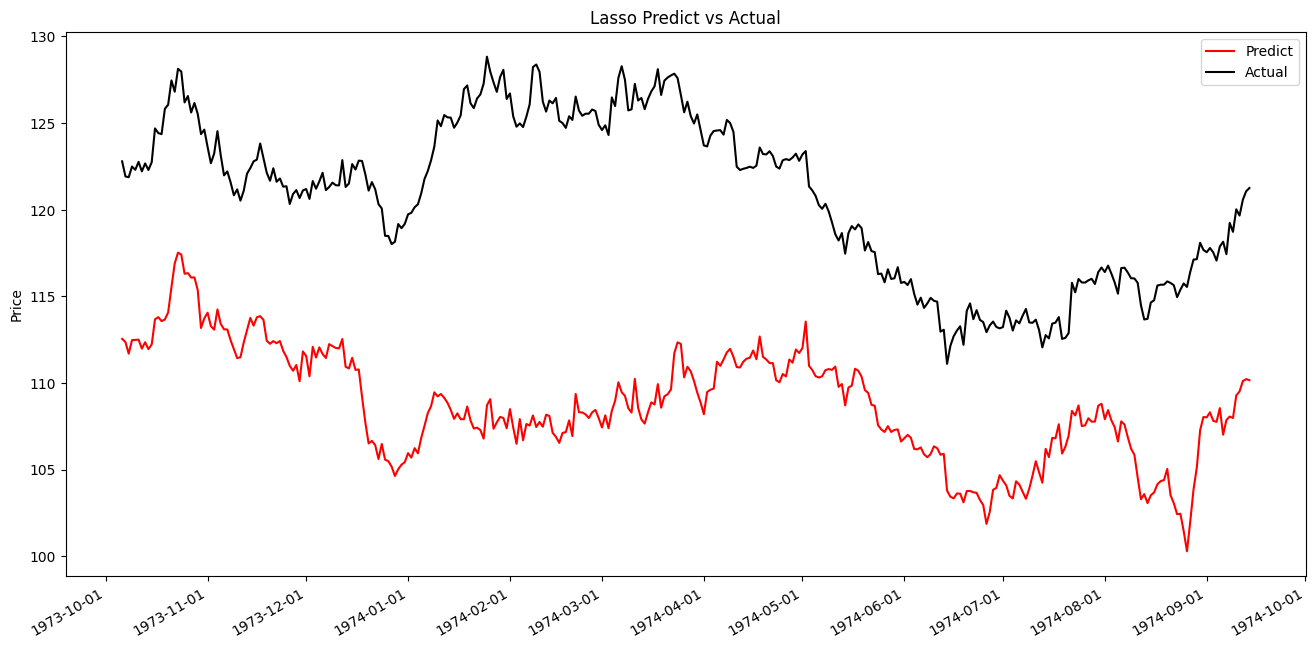

In [47]:
#TODO: Implementar un modelo de regresión lineal con regularización Lasso
lasso = LassoCV(n_alphas=5000)
lasso.fit(X_train, y_train)

rendimiento_modelo(lasso, "Lasso", mse_dict, rmse_dict)

### Regresión Ridge

Rendimiento del modelo
--------------------------------------
MSE      : 28.32
RMSE     : 5.32
R2 score : -0.32
--------------------------------------


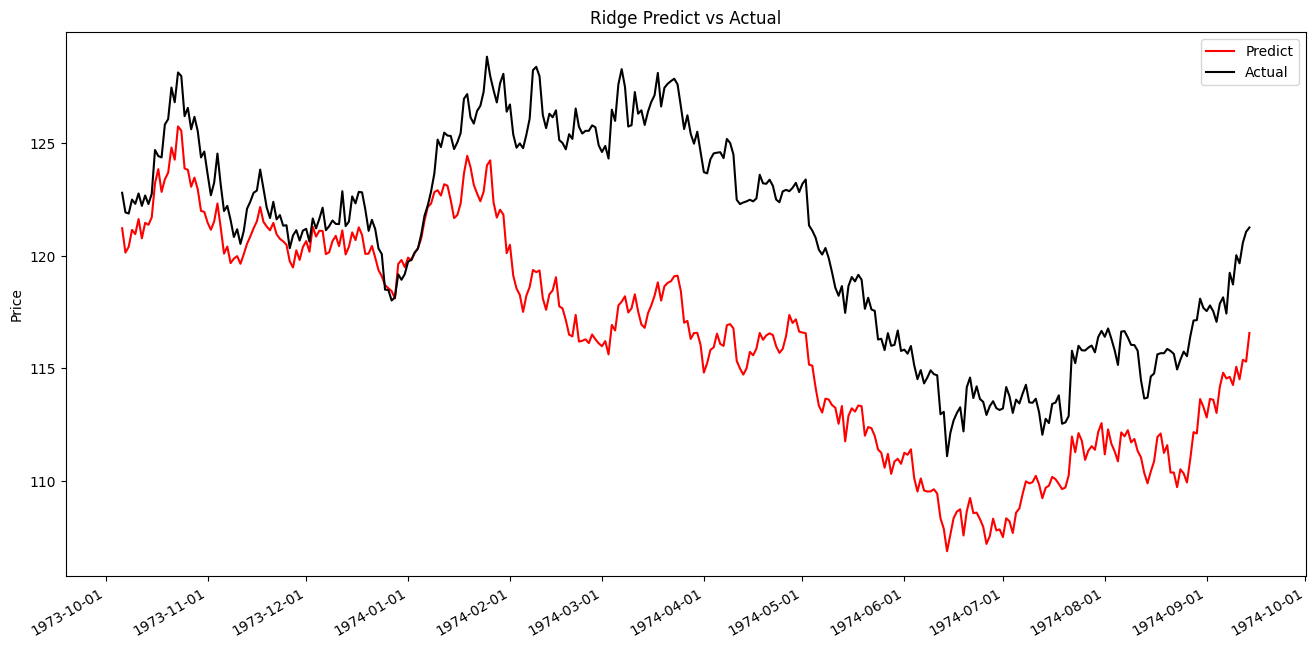

In [48]:
#TODO: Implementar un modelo de regresión lineal con regularización Ridge
r_alphas = np.logspace(0, 5, 5000) # Colocar muchos alpha para cross validation
ridgeReg = RidgeCV(alphas= r_alphas)
ridgeReg.fit(X_train, y_train)

rendimiento_modelo(ridgeReg, "Ridge",mse_dict, rmse_dict)

### Arbol de decisión

Este es un modelo de aprendizaje supervisado en donde dividimos el conjunto de datos en subconjuntos más pequeños basados en características específicas para poder clasificar y predecir los precios del oro. Posteriormente, se realizará un modelo de bosque aleatorio o random forest, que es una técnica que constituye varios árboles de decisión.

En este caso, se espera que el modelo de Bosque Aleatorio o Random Forest sea más resistente al sobreajuste en comparación con un solo árbol de decisión, lo que lo hace más adecuado para conjuntos de datos complejos con múltiples características.

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
# Función para ver el rendimiento del modelo de árbol de decisión
def rendimiento_modelo_arbol(model, model_name, mse_dict, rmse_dict):
    # Predicciones
    predicted = model.predict(X_test)
    # Rsmse y R2 score
    RSME_score = np.sqrt(mean_squared_error(y_test, predicted))
    
    # Imprimir los resultados
    print("Rendimiento del modelo de árbol de decisión")
    print("--------------------------------------")
    mse = mean_squared_error(y_test, predicted)
    print(f"MSE      : {mse:.2f}")
    print(f'RMSE     : {RSME_score:.2f}')
    R2_score = r2_score(y_test, predicted)
    print(f'R2 score : {R2_score:.2f}')
    print("--------------------------------------")
    
    # Guardar los resultados
    mse_dict[model_name] = mse
    rmse_dict[model_name] = RSME_score
    
    # Graficar los resultados
    # Predicciones vs Actual
    plt.figure(figsize=(16, 8))
    plt.plot(y_test.index, predicted,'red', label='Predict')
    plt.plot(y_test.index, y_test,'black', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    # 45 grados
    plt.gcf().autofmt_xdate()
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

Rendimiento del modelo de árbol de decisión
--------------------------------------
MSE      : 40.73
RMSE     : 6.38
R2 score : -0.90
--------------------------------------


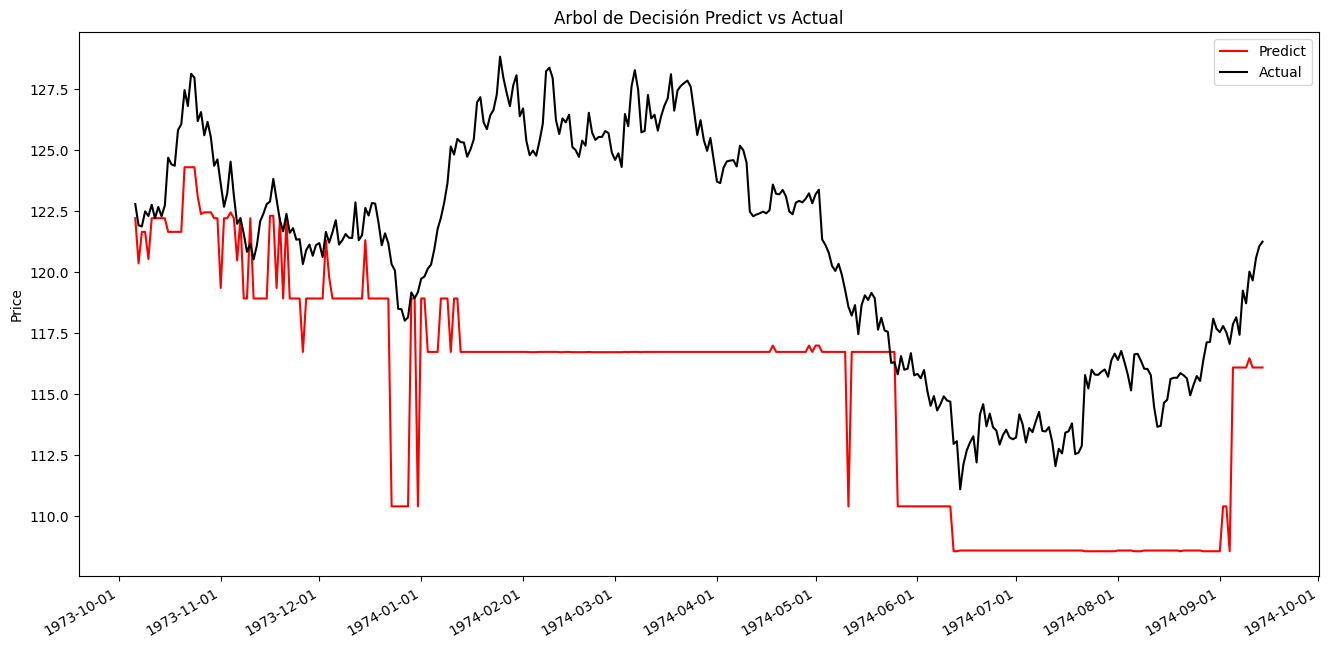

In [51]:
# Modelo de árbol de decisión
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Evaluación del modelo de árbol de decisión
rendimiento_modelo_arbol(tree_model, "Arbol de Decisión", mse_dict, rmse_dict)

### Bosque Aleatorio 

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
# Función para ver el rendimiento del modelo de Bosque Aleatorio
def rendimiento_modelo_random_forest(model, model_name, mse_dict, rmse_dict):
    # Predicciones
    predicted = model.predict(X_test)
    # Rsmse and R2 score
    RSME_score = np.sqrt(mean_squared_error(y_test, predicted))
    # Imprimir los resultados
    print("Rendimiento del modelo de Bosque Aleatorio")
    print("--------------------------------------")
    mse = mean_squared_error(y_test, predicted)
    print(f"MSE      : {mse:.2f}")
    print(f'RMSE     : {RSME_score:.2f}')
    R2_score = r2_score(y_test, predicted)
    print(f'R2 score : {R2_score:.2f}')
    print("--------------------------------------")
    
    # Guardar los resultados
    mse_dict[model_name] = mse
    rmse_dict[model_name] = RSME_score
    
    # Graficar los resultados
    # Predicciones vs Actual
    plt.figure(figsize=(16, 8))
    plt.plot(y_test.index, predicted,'red', label='Predict')
    plt.plot(y_test.index, y_test,'black', label='Actual')
    plt.ylabel('Price')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    # 45 grados
    plt.gcf().autofmt_xdate()
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

Rendimiento del modelo de Bosque Aleatorio
--------------------------------------
MSE      : 23.01
RMSE     : 4.80
R2 score : -0.07
--------------------------------------


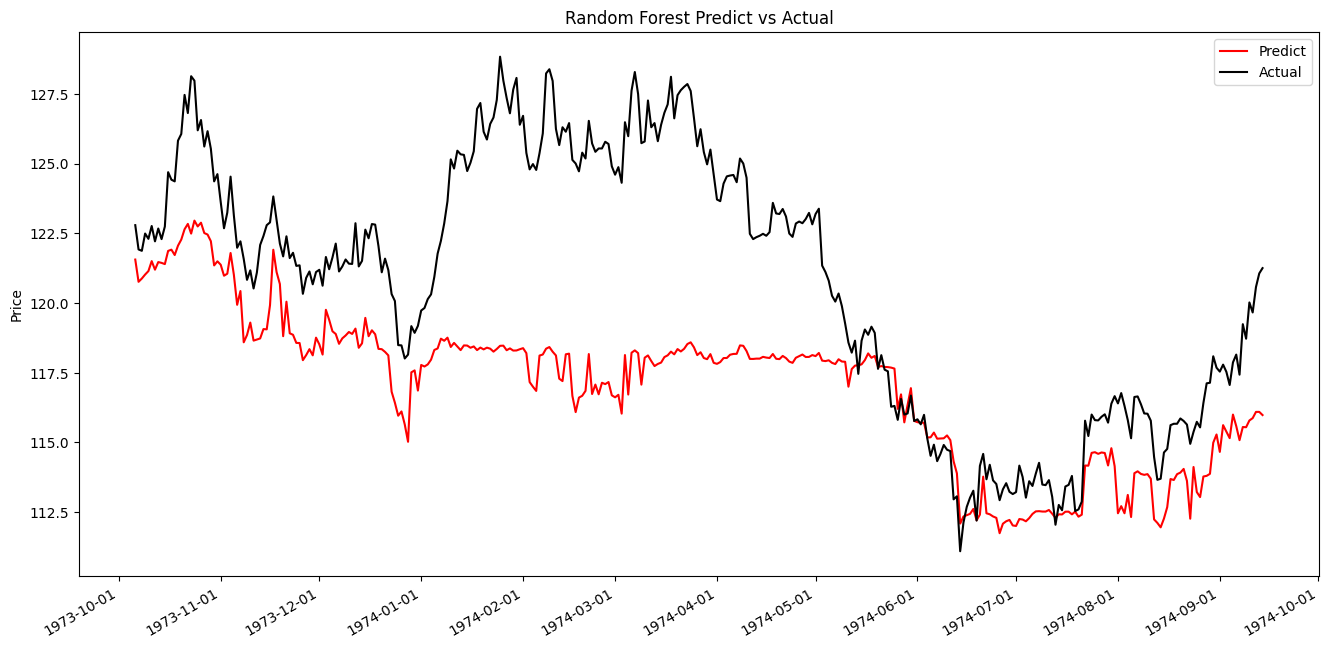

In [54]:
# Modelo de Bosque Aleatorio
random_forest_model = RandomForestRegressor()
y_train = np.ravel(y_train)
random_forest_model.fit(X_train, y_train)

# Evaluación del modelo de Bosque Aleatorio
rendimiento_modelo_random_forest(random_forest_model, "Random Forest", mse_dict, rmse_dict)

### Gradient Boosting

In [55]:
#TODO: Implementar un modelo de potenciación de gradiente

### Extreme Gradient Boosting

Rendimiento del modelo
--------------------------------------
MSE      : 25.78
RMSE     : 5.08
R2 score : -0.20
--------------------------------------


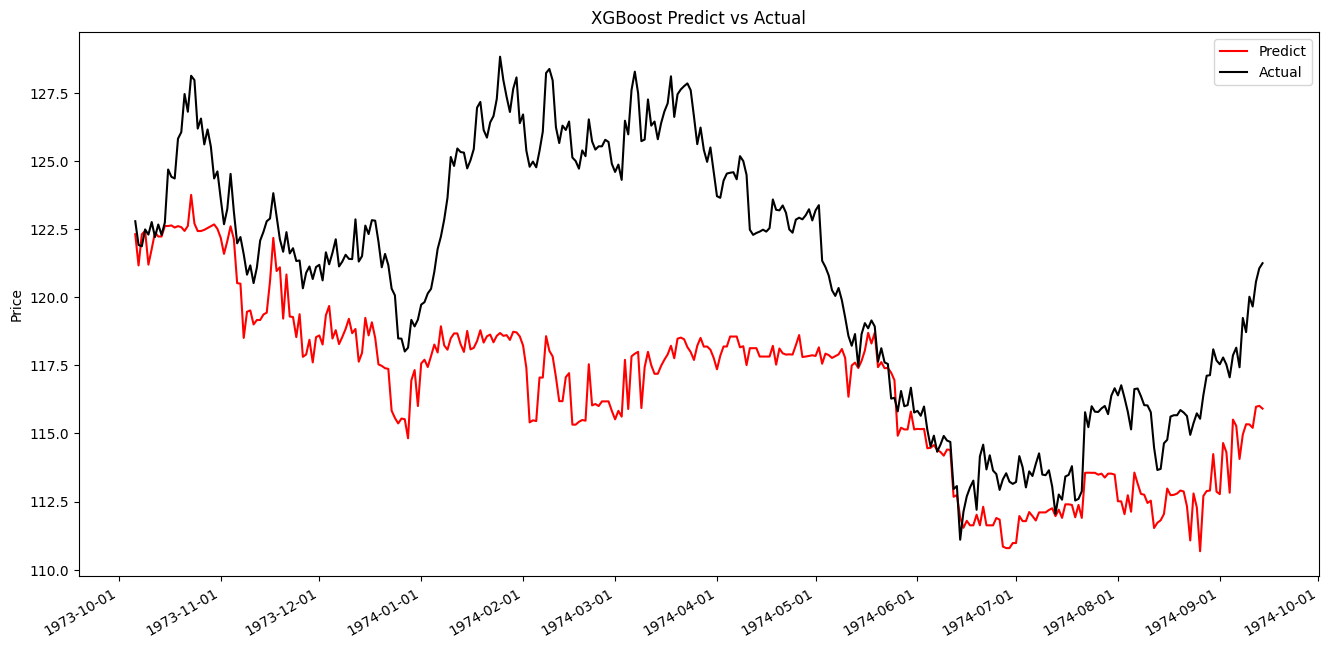

In [58]:
# se realiza el modelo de xgboost metodo de ensamble
import xgboost as xgb
model = xgb.XGBRegressor()

#Training the model on the training data
model.fit(X_train, y_train)
rendimiento_modelo(model, "XGBoost", mse_dict, rmse_dict)

## Deep Learning


In [23]:
# Librerias para poder correr modelos de deep learning
import itertools
import os 
import random 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,GRU,SimpleRNN, RNN, Input, Bidirectional
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from sklearn.model_selection import GroupKFold

from tensorflow.keras.optimizers.schedules import ExponentialDecay

import warnings
warnings.simplefilter(action='ignore', category= FutureWarning)

### Long short-term memory

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1374, 13)
(344, 13)
(1374, 1)
(344, 1)


In [36]:
X_train

,sp_ajclose,dj_ajclose,eg_ajclose,uso_adj close,gdx_adj close,eu_price,of_price,os_price,sf_price,usb_price,plt_price,pld_price,usdi_price
0,105.441238,11868.80957,70.431755,36.130001,48.973877,1.3018,105.09,93.42,53604,1.911,1414.65,618.85,80.341
1,105.597549,11866.38965,72.364037,36.270000,49.921513,1.3035,103.35,93.79,53458,1.851,1420.25,623.65,80.249
2,104.468536,11766.25977,62.509384,36.200001,48.490578,1.2995,103.64,94.09,52961,1.810,1411.10,608.80,80.207
3,107.629784,12103.58008,64.731514,37.560001,50.215282,1.3079,106.73,95.55,53487,1.927,1434.75,626.65,80.273
4,107.838242,12107.74023,66.180725,38.110001,50.186852,1.3045,107.71,99.01,53148,1.970,1429.05,635.90,80.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,240.370468,22092.81055,9.150000,10.130000,22.024824,1.1772,52.42,49.52,37262,2.264,967.85,874.80,93.416
1370,240.817352,22118.41992,9.650000,10.100000,21.906412,1.1796,52.37,49.33,37271,2.257,970.15,885.20,93.309
1371,240.224716,22085.33984,9.500000,10.060000,21.955751,1.1750,52.14,48.97,37499,2.262,975.90,898.40,93.515
1372,240.215027,22048.69922,9.600000,10.150000,22.301123,1.1759,52.70,49.69,38590,2.249,978.25,891.85,93.430


In [37]:
X_test

,sp_ajclose,dj_ajclose,eg_ajclose,uso_adj close,gdx_adj close,eu_price,of_price,os_price,sf_price,usb_price,plt_price,pld_price,usdi_price
1374,237.174072,21858.32031,10.00,9.99,22.843849,1.1821,52.10,48.80,39194,2.191,987.80,894.70,92.956
1375,239.525208,21993.71094,9.55,9.72,22.528080,1.1780,50.73,47.52,39178,2.224,969.05,898.15,93.305
1376,239.913834,22024.86914,9.45,9.57,22.774775,1.1770,50.27,46.78,38863,2.225,982.55,910.20,93.438
1377,236.173386,21750.73047,9.35,9.62,22.725435,1.1724,51.03,46.95,39098,2.185,980.00,926.15,93.534
1378,235.804199,21674.50977,9.50,9.97,22.626759,1.1762,52.72,48.63,39063,2.197,981.75,927.10,93.359
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,234.339996,21792.19922,2.95,9.29,21.090000,1.1400,50.47,42.27,37541,2.736,788.40,1172.80,96.007
1714,246.179993,22878.44922,3.00,9.90,20.620001,1.1353,54.47,46.39,38253,2.810,799.25,1190.10,96.568
1715,248.070007,23138.82031,2.95,9.62,20.969999,1.1430,52.16,45.23,38690,2.774,795.50,1196.00,96.001
1716,247.750000,23062.40039,2.90,9.53,20.600000,1.1438,52.20,44.92,38706,2.716,790.25,1185.20,95.965


Epoch 1/10


c:\Users\jpber\OneDrive\Documents\Universidad\QuantConsulting\Git\GOLD-FORECAST\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 16781.4531
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15688.5088
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14554.5684
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14011.5391
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13485.3408
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12738.0547
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12119.1504
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11325.8672
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10945.8584
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10327.5791
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Rendimiento del modelo
--------------------------------------
MSE      : 8087.27
RMSE     : 89.93
R2 score : -376.13
--------------------------------------


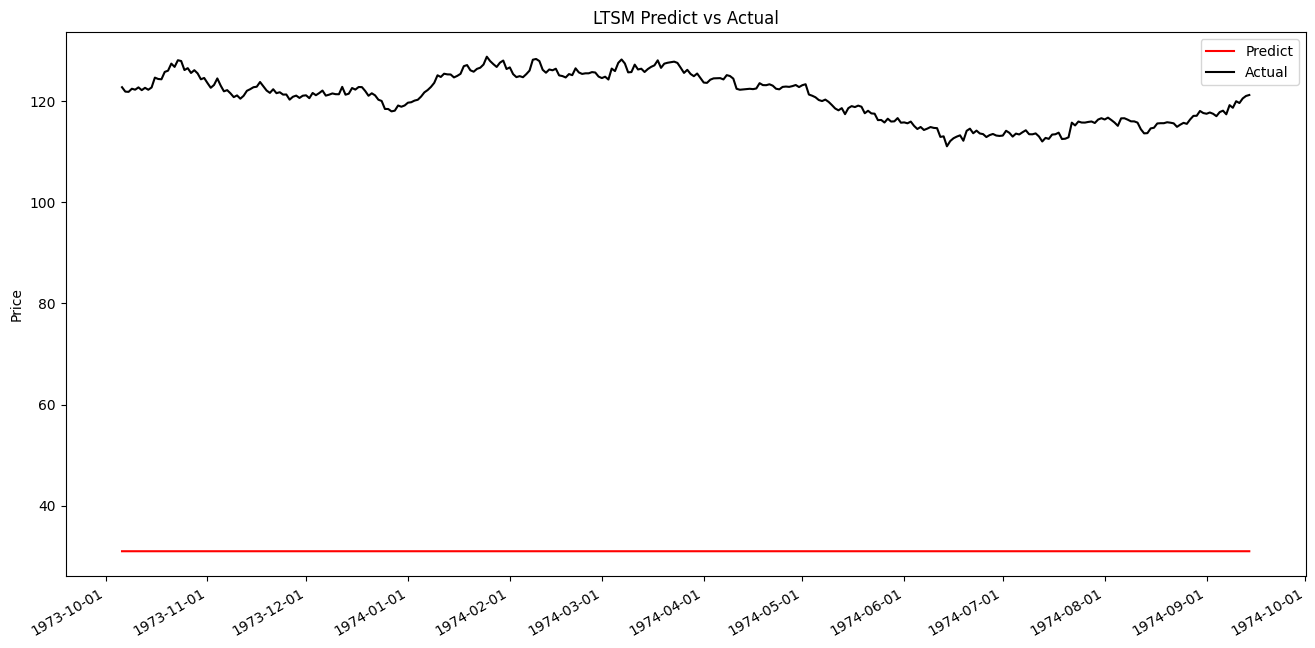

In [35]:
#TODO: Implementar un modelo long short-term memory (LSTM)
# Funcion para generar secuencias


model = Sequential()
model.add(LSTM(units=64, input_shape=(100, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs = 10, batch_size = 32)

rendimiento_modelo(model, "LTSM", mse_dict, rmse_dict)


# Observar comportamiento de los modelos

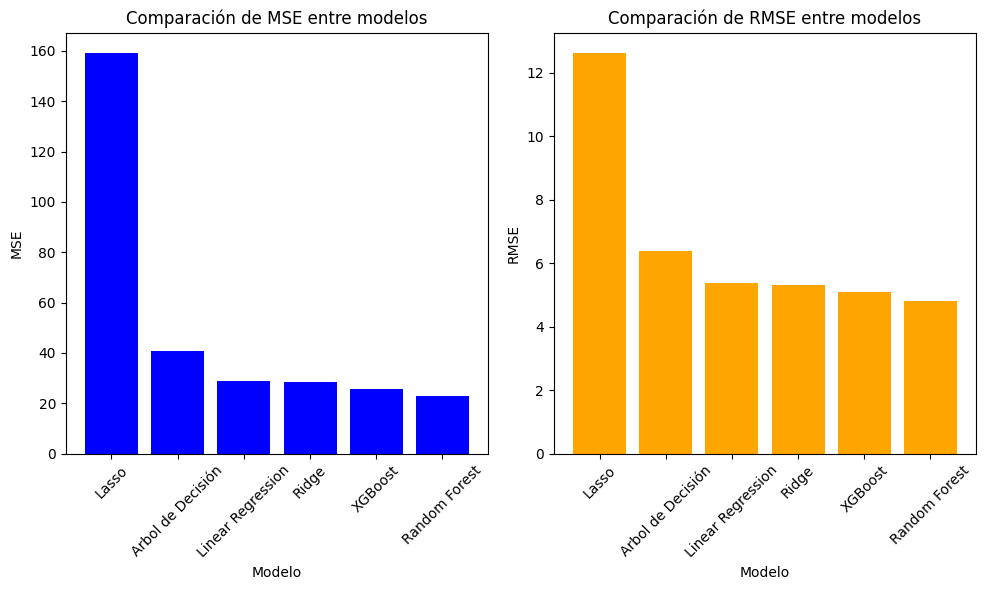

In [59]:
# Ordenar los resultados de MSE y RMSE de mayor a menor
mse_dict = dict(sorted(mse_dict.items(), key=lambda item: item[1], reverse=True))
rmse_dict = dict(sorted(rmse_dict.items(), key=lambda item: item[1], reverse=True))


# Gráficos de barras para MSE y RMSE
plt.figure(figsize=(10, 6))

# Gráfico de barras para MSE
plt.subplot(1, 2, 1)
plt.bar(mse_dict.keys(), mse_dict.values(), color='blue')
plt.xlabel('Modelo')
plt.ylabel('MSE')
plt.title('Comparación de MSE entre modelos')
plt.xticks(rotation=45)

# Gráfico de barras para RMSE
plt.subplot(1, 2, 2)
plt.bar(rmse_dict.keys(), rmse_dict.values(), color='orange')
plt.xlabel('Modelo')
plt.ylabel('RMSE')
plt.title('Comparación de RMSE entre modelos')
# 45 grados
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<div >
<img src = "./imagen_grupo.png" />
</div>